In [1]:
# IMPORT FUNCTIONS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from important_functions import plot_drug_response, plot_biomarkers, generate_dat, get_ind_data
import myokit
from mpl_toolkits.mplot3d import axes3d
from matplotlib.gridspec import GridSpec

# LOAD IN EXTRA DATA
paci_vcp_data = pd.read_csv('./data/paci_vcp_data.csv.bz2')
kernik_vcp_data = pd.read_csv('./data/kernik_vcp_data.csv.bz2')
adjusted_model_data = pd.read_csv('./data/best_drug_data.csv')
cell_stats = pd.read_csv('./data/cell_stats.csv')
cell_stats = cell_stats[(cell_stats['file']!='031621_2_verapamil') & (cell_stats['file']!='031121_3_control')] #filter out this file since it is broken
biomarker_bounds = pd.read_csv('./data/biomarker_bounds.csv', index_col = [0])
biomarkers = biomarker_bounds['Mean Baseline'].keys().tolist()
biomarker_labels_list = ['$dV/dt_{max}$ (mV/ms)', '$RMP$  (mV)', '$APA$ (mV)', '$APD_{10}$ (ms)', '$APD_{20}$ (ms)', '$APD_{30}$ (ms)', '$APD_{60}$ (ms)', '$APD_{90}$ (ms)', 'Triangulation']
biomarker_labels = dict(zip(biomarkers, biomarker_labels_list))

# Grant Figures
Code to generate some of the figures included in our grant submission on June 4th 2024.

### Figure 1

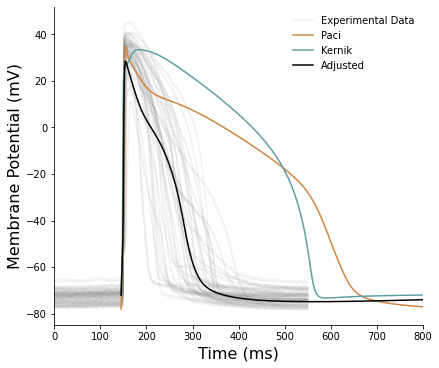

In [34]:
fig, axs0 = plt.subplots(1, figsize = (6,5), constrained_layout = True)

##########################################################################################################################################################
cell = pd.read_csv('./data/ipsc_csv/'+cell_stats['file'][0]+'/pre-drug_paced.csv')
axs0.plot(np.array(cell['Time (s)'])*1000, np.array(cell['Voltage (V)'])*1000, color = 'grey', alpha = 0.1, label = 'Experimental Data')
for i in cell_stats['file'].tolist():
    if i != '031121_3_control' and i !='031621_2_verapamil':
        cell = pd.read_csv('./data/ipsc_csv/'+i+'/pre-drug_paced.csv')
        axs0.plot(np.array(cell['Time (s)'])*1000, np.array(cell['Voltage (V)'])*1000, color = 'grey', alpha = 0.1)

axs0.plot(np.array(eval(paci_vcp_data['t_Control'][0]))+145, eval(paci_vcp_data['v_Control'][0]), color = 'peru', label = 'Paci')
axs0.plot(np.array(eval(kernik_vcp_data['t_Control'][0]))+145, eval(kernik_vcp_data['v_Control'][0]), color = 'cadetblue', label = 'Kernik')
axs0.plot(np.array(eval(adjusted_model_data['t_Control'][0]))+145, eval(adjusted_model_data['v_Control'][0]), color = 'black', label = 'Adjusted')

axs0.legend(frameon=False)
axs0.set_xlim([0, 800])
axs0.set_xlabel('Time (ms)', fontsize = 16)
axs0.set_ylabel('Membrane Potential (mV)', fontsize = 16)
axs0.spines[['right', 'top']].set_visible(False)

plt.savefig('./figures/fig1.pdf')
plt.savefig('./figures/fig1.png', dpi = 300)

### Figure 2

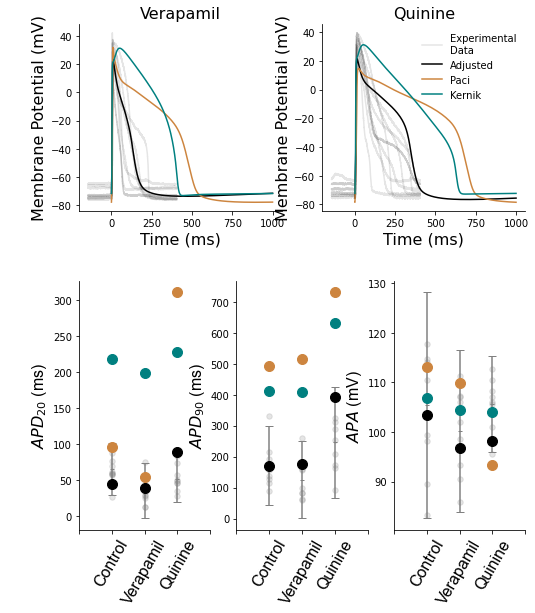

In [3]:
fig = plt.figure(figsize = (8, 8)) 
gs = GridSpec(nrows=2, ncols=1, figure = fig, height_ratios=[3, 4]) 

sub = fig.add_subfigure(gs[0])
axs = sub.subplots(1, 2)

sub1 = fig.add_subfigure(gs[1])
axs1 = sub1.subplots(1, 3)

#######################################################################################################################################################################################################

plot_drug_response(adjusted_model_data, 'Verapamil', axs[0], cell_stats)
plot_drug_response(adjusted_model_data, 'Quinine', axs[1], cell_stats, legend = True)

drugs = ['Control', 'Verapamil', 'Quinine']
plot_biomarkers(adjusted_model_data, drugs, axs=axs1[0], biomarker = 'apd20', biomarker_label = '$APD_{20}$ (ms)')
plot_biomarkers(adjusted_model_data, drugs, axs=axs1[1], biomarker_label = '$APD_{90}$ (ms)')
plot_biomarkers(adjusted_model_data, drugs, axs=axs1[2], biomarker = 'apa', biomarker_label = '$APA$ (mV)')

for i in [0, 1]:
    axs[i].spines[['right', 'top']].set_visible(False)

for i in [0, 1, 2]:
    axs1[i].spines[['right', 'top']].set_visible(False)


plt.savefig('./figures/fig2.pdf')
plt.savefig('./figures/fig2.png', dpi = 300)

### Figure 3

INa Reversal Potential: 79.38894405183737


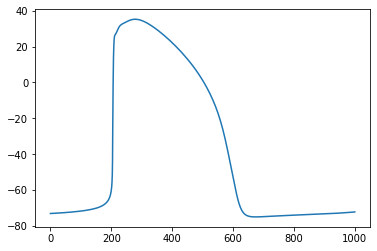

In [7]:
from important_functions import run_model
dat, IC = run_model('Kernik', all_params={'geom.Cm': 50, 'voltageclamp.gLeak':0})
plt.plot(dat['engine.time'], dat['membrane.V'])

print('INa Reversal Potential:', dat['erev.E_Na'][0])

--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\tempfile.py", line 478, in func_wrapper
    return func(*args, **kwargs)
ValueError: I/O operation on closed file.
Call stack:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Kristin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykerne

-3.45 72.45


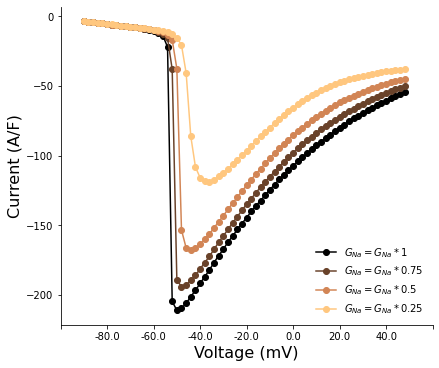

In [19]:
fig, axs = plt.subplots(1, figsize = (6,5), constrained_layout = True)
gna_vals = [1, 0.75, 0.5, 0.25]
cmap = plt.get_cmap('copper', len(gna_vals))
#generate_dat(gna_vals)
iv_dat = pd.read_csv('./data/all_sim.csv')
iv_dat = iv_dat.T

# Make Plot
#x_data = list(iv_dat.index)
for i in range(0, iv_dat.shape[1]):
    axs.plot(iv_dat[i], label = '$G_{Na}= G_{Na}*$'+str(gna_vals[i]), color = cmap(i), marker='o')

axs.legend(frameon = False)
axs.set_ylabel('Current (A/F)', fontsize = 16)
axs.set_xlabel('Voltage (mV)', fontsize = 16)

start, end = axs.get_xlim()
print(start, end)
axs.xaxis.set_ticks(np.arange(-5, 80, 10))
axs.spines[['right', 'top']].set_visible(False)

plt.savefig('./figures/fig3.pdf')
plt.savefig('./figures/fig3.png', dpi = 300)


### Figure 4

In [66]:
# Parameters
run_sim = True
n = 100
paced_cells = 5
conductance = 9
stimulus = 20
prepace = 10

Finished First Sim
Finished Second Sim
Finished Third Sim


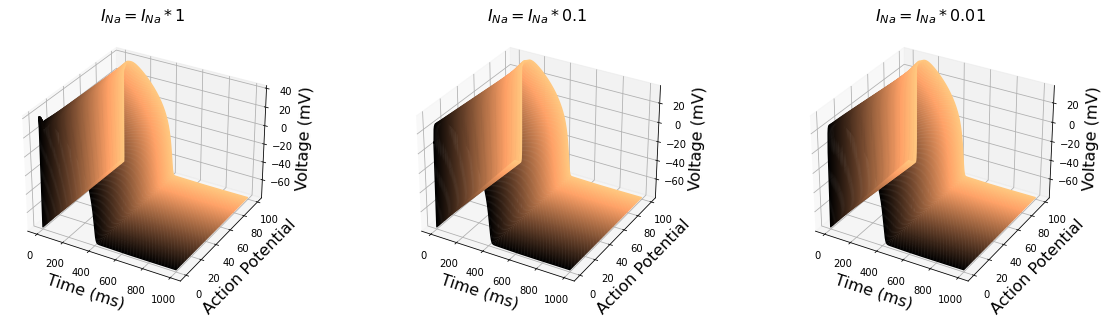

In [67]:
# STIMULATED
fig = plt.figure(figsize = (20, 5)) 
gs = GridSpec(nrows=1, ncols=3, figure = fig) 

ax = fig.add_subplot(gs[0], projection='3d')
ax1 = fig.add_subplot(gs[1], projection='3d')
ax2 = fig.add_subplot(gs[2], projection='3d')

###################################################################################

# Run simulation
cmap = plt.get_cmap('copper', n)
#"""
if run_sim == True:
    mod, proto = get_ind_data('Kernik', all_params = {'geom.Cm': 50, 'voltageclamp.gLeak':0, 'parameters.ik1_ishi_dc_scale':0.5}, artifact = False)  
    proto.schedule(stimulus, 0, 5, 1000, 0) 
    s = myokit.Simulation1d(mod, proto, n)
    s.pre(prepace*1000)
    s.set_conductance(conductance)
    s.set_step_size(0.01)
    s.set_paced_cells(paced_cells)
    d = s.run(1000, log=['engine.time', 'membrane.V', 'cai.Cai'])
#"""

# Show figures
z = np.ones(len(d['engine.time']))
for i in range(0, n):
    ax.plot(d['engine.time'], z*i, d['membrane.V', i], color = cmap(i))

ax.set_xlabel('Time (ms)', fontsize=16)
ax.set_ylabel('Action Potential', fontsize=16)
ax.set_zlabel('Voltage (mV)', fontsize=16)
ax.set_title('$I_{Na}=I_{Na}*1$', fontsize=16)

print('Finished First Sim')

###################################################################################

# Run simulation
#"""
if run_sim == True:
    mod, proto = get_ind_data('Kernik', all_params = {'geom.Cm': 50, 'voltageclamp.gLeak':0, 'multipliers.i_na_multiplier':0.1, 'parameters.ik1_ishi_dc_scale':0.5}, artifact = False)  
    proto.schedule(stimulus, 0, 5, 1000, 0) 
    s = myokit.Simulation1d(mod, proto, n)
    s.pre(prepace*1000)
    s.set_conductance(conductance)
    s.set_step_size(0.01)
    s.set_paced_cells(paced_cells)
    d_1 = s.run(1000, log=['engine.time', 'membrane.V', 'cai.Cai'])
#"""

# Show figures
z = np.ones(len(d_1['engine.time']))
for i in range(0, n):
    ax1.plot(d_1['engine.time'], z*i, d_1['membrane.V', i], color = cmap(i))

ax1.set_xlabel('Time (ms)', fontsize=16)
ax1.set_ylabel('Action Potential', fontsize=16)
ax1.set_zlabel('Voltage (mV)', fontsize=16)
ax1.set_title('$I_{Na}=I_{Na}*0.1$', fontsize=16)


print('Finished Second Sim')
###################################################################################

# Run simulation
#"""

if run_sim == True:
    mod, proto = get_ind_data('Kernik', all_params = {'geom.Cm': 50, 'voltageclamp.gLeak':0, 'multipliers.i_na_multiplier':0.01, 'parameters.ik1_ishi_dc_scale':0.5}, artifact = False)  
    proto.schedule(stimulus, 0, 5, 1000, 0) 
    s = myokit.Simulation1d(mod, proto, n)
    s.pre(prepace*1000)
    s.set_conductance(conductance)
    s.set_step_size(0.01)
    s.set_paced_cells(paced_cells)
    d_3 = s.run(1000, log=['engine.time', 'membrane.V', 'cai.Cai'])

# Show figures
z = np.ones(len(d_3['engine.time']))
for i in range(0, n):
    ax2.plot(d_3['engine.time'], z*i, d_3['membrane.V', i], color = cmap(i))

ax2.set_xlabel('Time (ms)', fontsize=16)
ax2.set_ylabel('Action Potential', fontsize=16)
ax2.set_zlabel('Voltage (mV)', fontsize=16)
ax2.set_title('$I_{Na}=I_{Na}*0.01$', fontsize=16)
#"""
print('Finished Third Sim')

plt.savefig('./figures/fig4.pdf')
plt.savefig('./figures/fig4.png', dpi = 300)

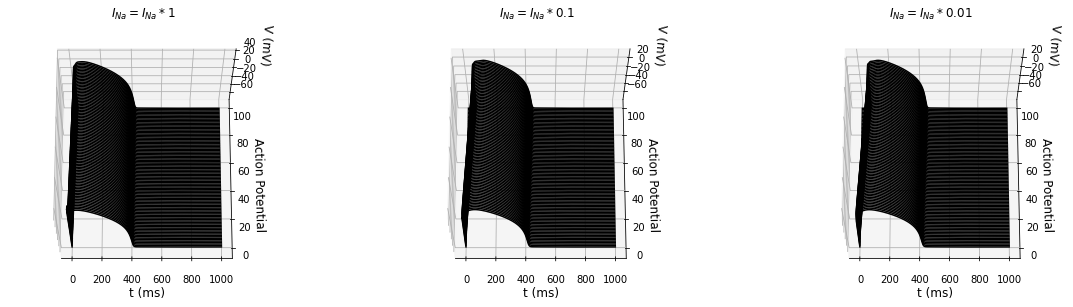

In [68]:
# Show figures
fig = plt.figure(figsize = (20, 5)) 
gs = GridSpec(nrows=1, ncols=3, figure = fig) 

ax = fig.add_subplot(gs[0], projection='3d')
ax1 = fig.add_subplot(gs[1], projection='3d')
ax2 = fig.add_subplot(gs[2], projection='3d')

z = np.ones(len(d['engine.time']))
for i in range(0, n):
    ax.plot(d['engine.time'], z*i, d['membrane.V', i], color = 'black')
ax.set_xlabel('t (ms)', fontsize=12)
ax.set_ylabel('Action Potential', fontsize=12)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('V (mV)', fontsize=12, rotation = 265, labelpad = 7)
ax.set_title('$I_{Na}=I_{Na}*1$', fontsize=12)
ax.view_init(70, 270)

z = np.ones(len(d_1['engine.time']))
for i in range(0, n):
    ax1.plot(d_1['engine.time'], z*i, d_1['membrane.V', i], color = 'black')
ax1.set_xlabel('t (ms)', fontsize=12)
ax1.set_ylabel('Action Potential', fontsize=12)
ax1.zaxis.set_rotate_label(False)
ax1.set_zlabel('V (mV)', fontsize=12, rotation = 265, labelpad = 7)
ax1.set_title('$I_{Na}=I_{Na}*0.1$', fontsize=12)
ax1.view_init(70, 270)

z = np.ones(len(d_3['engine.time']))
for i in range(0, n):
    ax2.plot(d_3['engine.time'], z*i, d_3['membrane.V', i], color = 'black')
ax2.set_xlabel('t (ms)', fontsize=12)
ax2.set_ylabel('Action Potential', fontsize=12)
ax2.zaxis.set_rotate_label(False)
ax2.set_zlabel('V (mV)', fontsize=12, rotation = 265, labelpad = 7)
ax2.set_title('$I_{Na}=I_{Na}*0.01$', fontsize=12)
ax2.view_init(70, 270)

plt.savefig('./figures/fig4c.pdf')
plt.savefig('./figures/fig4c.png', dpi = 300)

In [4]:
# Parameters
run_sim = True
n = 100
paced_cells = 5
conductance = 0.1
stimulus = 20
prepace = 10
cmap = plt.get_cmap('copper', n)


Finished First Sim
Finished Second Sim
Finished Third Sim


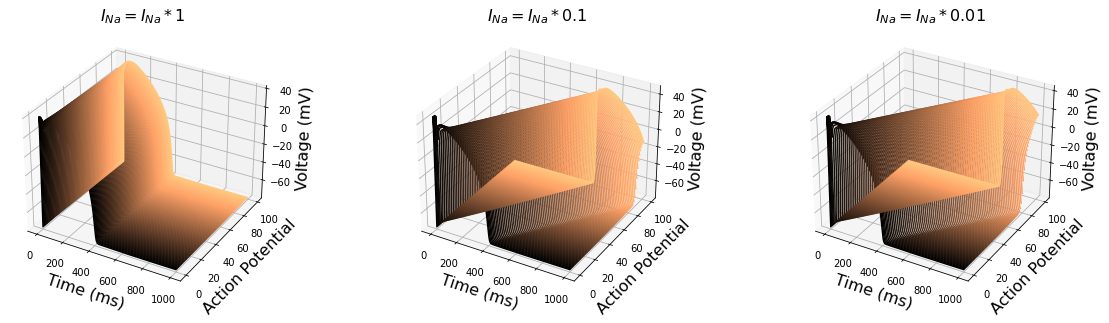

In [5]:
# STIMULATED
fig = plt.figure(figsize = (20, 5)) 
gs = GridSpec(nrows=1, ncols=3, figure = fig) 

ax = fig.add_subplot(gs[0], projection='3d')
ax1 = fig.add_subplot(gs[1], projection='3d')
ax2 = fig.add_subplot(gs[2], projection='3d')

###################################################################################

# Run simulation
"""
if run_sim == True:
    mod, proto = get_ind_data('Kernik', all_params = {'geom.Cm': 50, 'voltageclamp.gLeak':0, 'parameters.ik1_ishi_dc_scale':0.5}, artifact = False)  
    proto.schedule(stimulus, 0, 5, 1000, 0) 
    s = myokit.Simulation1d(mod, proto, n)
    s.pre(prepace*1000)
    s.set_conductance(conductance)
    s.set_step_size(0.01)
    s.set_paced_cells(paced_cells)
    d = s.run(1000, log=['engine.time', 'membrane.V', 'cai.Cai'])
"""

# Show figures
z = np.ones(len(d['engine.time']))
for i in range(0, n):
    ax.plot(d['engine.time'], z*i, d['membrane.V', i], color = cmap(i))

ax.set_xlabel('Time (ms)', fontsize=16)
ax.set_ylabel('Action Potential', fontsize=16)
ax.set_zlabel('Voltage (mV)', fontsize=16)
ax.set_title('$I_{Na}=I_{Na}*1$', fontsize=16)

print('Finished First Sim')

###################################################################################

# Run simulation
#"""
if run_sim == True:
    mod, proto = get_ind_data('Kernik', all_params = {'geom.Cm': 50, 'voltageclamp.gLeak':0, 'multipliers.i_na_multiplier':0.1, 'parameters.ik1_ishi_dc_scale':0.5}, artifact = False)  
    proto.schedule(stimulus, 0, 5, 1000, 0) 
    s = myokit.Simulation1d(mod, proto, n)
    s.pre(prepace*1000)
    s.set_conductance(conductance)
    s.set_step_size(0.01)
    s.set_paced_cells(paced_cells)
    d_1 = s.run(1000, log=['engine.time', 'membrane.V', 'cai.Cai'])


# Show figures
z = np.ones(len(d_1['engine.time']))
for i in range(0, n):
    ax1.plot(d_1['engine.time'], z*i, d_1['membrane.V', i], color = cmap(i))

ax1.set_xlabel('Time (ms)', fontsize=16)
ax1.set_ylabel('Action Potential', fontsize=16)
ax1.set_zlabel('Voltage (mV)', fontsize=16)
ax1.set_title('$I_{Na}=I_{Na}*0.1$', fontsize=16)


print('Finished Second Sim')
###################################################################################

# Run simulation


if run_sim == True:
    mod, proto = get_ind_data('Kernik', all_params = {'geom.Cm': 50, 'voltageclamp.gLeak':0, 'multipliers.i_na_multiplier':0.01, 'parameters.ik1_ishi_dc_scale':0.5}, artifact = False)  
    proto.schedule(stimulus, 0, 5, 1000, 0) 
    s = myokit.Simulation1d(mod, proto, n)
    s.pre(prepace*1000)
    s.set_conductance(conductance)
    s.set_step_size(0.01)
    s.set_paced_cells(paced_cells)
    d_3 = s.run(1000, log=['engine.time', 'membrane.V', 'cai.Cai'])

# Show figures
z = np.ones(len(d_3['engine.time']))
for i in range(0, n):
    ax2.plot(d_3['engine.time'], z*i, d_3['membrane.V', i], color = cmap(i))

ax2.set_xlabel('Time (ms)', fontsize=16)
ax2.set_ylabel('Action Potential', fontsize=16)
ax2.set_zlabel('Voltage (mV)', fontsize=16)
ax2.set_title('$I_{Na}=I_{Na}*0.01$', fontsize=16)
#ax2.view_init(60, 30)
#"""
print('Finished Third Sim')

plt.savefig('./figures/fig4a.pdf')
plt.savefig('./figures/fig4a.png', dpi = 300)

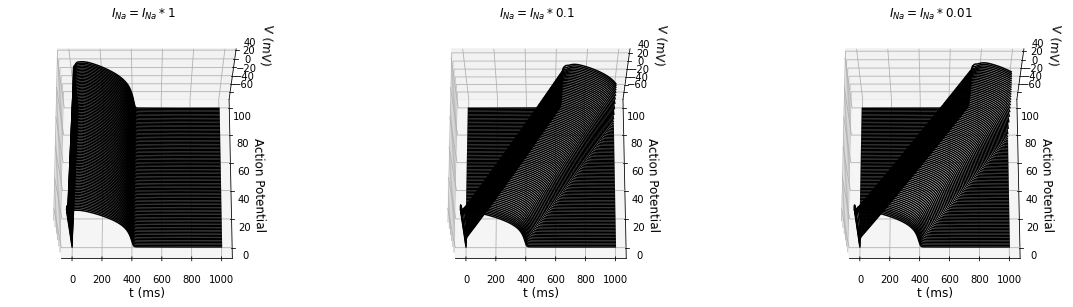

In [65]:
# Show figures
fig = plt.figure(figsize = (20, 5)) 
gs = GridSpec(nrows=1, ncols=3, figure = fig) 

ax = fig.add_subplot(gs[0], projection='3d')
ax1 = fig.add_subplot(gs[1], projection='3d')
ax2 = fig.add_subplot(gs[2], projection='3d')

z = np.ones(len(d['engine.time']))
for i in range(0, n):
    ax.plot(d['engine.time'], z*i, d['membrane.V', i], color = 'black')
ax.set_xlabel('t (ms)', fontsize=12)
ax.set_ylabel('Action Potential', fontsize=12)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('V (mV)', fontsize=12, rotation = 265, labelpad = 7)
ax.set_title('$I_{Na}=I_{Na}*1$', fontsize=12)
ax.view_init(70, 270)

z = np.ones(len(d_1['engine.time']))
for i in range(0, n):
    ax1.plot(d_1['engine.time'], z*i, d_1['membrane.V', i], color = 'black')
ax1.set_xlabel('t (ms)', fontsize=12)
ax1.set_ylabel('Action Potential', fontsize=12)
ax1.zaxis.set_rotate_label(False)
ax1.set_zlabel('V (mV)', fontsize=12, rotation = 265, labelpad = 7)
ax1.set_title('$I_{Na}=I_{Na}*0.1$', fontsize=12)
ax1.view_init(70, 270)

z = np.ones(len(d_3['engine.time']))
for i in range(0, n):
    ax2.plot(d_3['engine.time'], z*i, d_3['membrane.V', i], color = 'black')
ax2.set_xlabel('t (ms)', fontsize=12)
ax2.set_ylabel('Action Potential', fontsize=12)
ax2.zaxis.set_rotate_label(False)
ax2.set_zlabel('V (mV)', fontsize=12, rotation = 265, labelpad = 7)
ax2.set_title('$I_{Na}=I_{Na}*0.01$', fontsize=12)
ax2.view_init(70, 270)

plt.savefig('./figures/fig4b.pdf')
plt.savefig('./figures/fig4b.png', dpi = 300)